
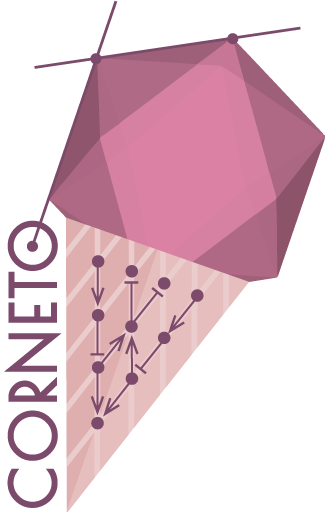

In [1]:
import corneto as cn
import numpy as np

cn.info()

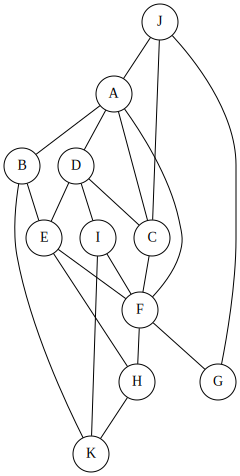

In [2]:
from corneto._graph import EdgeType

G = cn.Graph()
G.add_edges([
    ('A', 'B'),
    ('A', 'C'),
    ('A', 'D'),
    ('D', 'C'),
    ('D', 'E'),
    ('B', 'E'),
    ('E', 'F'),
    ('A', 'F'),
    ('F', 'G'),
    ('F', 'H'),
    ('H', 'E'),
    ('I', 'F'),
    ('D', 'I'),
    ('J', 'C'),
    ('J', 'G'),
    ('C', 'F'),
    ('J', 'A'),
    ('I', 'K'),
    ('H', 'K'),
    ('B', 'K')
], type=EdgeType.UNDIRECTED, weight=1)
G.plot()

In [3]:
# We will put prizes only in two nodes

prizes = {'G': 10, 'B': 10}

In [4]:
from corneto.methods.steiner import exact_steiner_tree

P, Gc = exact_steiner_tree(G, prizes)
P.solve(solver='SCIPY')

for n, o in zip(["Edge cost", "Prizes"], P.objectives):
    print(f"{n}:", o.value)

Edge cost: 3.0
Prizes: 20.0


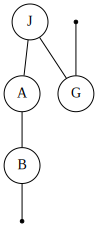

In [5]:
Gc.edge_subgraph(np.where(P.symbols['_flow_i'].value)[0]).plot()